In [1]:
import numpy as np
import pandas as pd
from tueplots import bundles
import matplotlib.pyplot as plt
from tueplots.constants.color import rgb

plt.rcParams.update(bundles.icml2022(column="half", nrows=1, ncols=1, usetex=False))
plt.rcParams.update({"figure.dpi": 1000, "font.family": "Nimbus Roman"})

import matplotlib.font_manager as fm

# Get list of available fonts
available_fonts = [f.name for f in fm.fontManager.ttflist]


print(available_fonts)


['STIXGeneral', 'DejaVu Sans Mono', 'STIXSizeOneSym', 'STIXGeneral', 'DejaVu Serif', 'STIXSizeThreeSym', 'cmb10', 'DejaVu Sans Mono', 'DejaVu Sans', 'STIXNonUnicode', 'DejaVu Serif', 'STIXSizeOneSym', 'cmmi10', 'cmss10', 'STIXGeneral', 'DejaVu Sans Display', 'STIXNonUnicode', 'STIXSizeTwoSym', 'STIXSizeFourSym', 'STIXSizeFiveSym', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Serif', 'DejaVu Serif Display', 'STIXNonUnicode', 'DejaVu Serif', 'STIXSizeThreeSym', 'cmr10', 'cmtt10', 'STIXSizeTwoSym', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans', 'STIXGeneral', 'STIXSizeFourSym', 'cmex10', 'cmsy10', 'STIXNonUnicode', 'Liberation Serif', 'Noto Serif Devanagari', 'Noto Serif Myanmar', 'Noto Serif Hebrew', 'Noto Serif Display', 'Noto Serif Georgian', 'Noto Serif Bengali', 'Noto Serif Display', 'C059', 'Noto Looped Lao', 'Roboto', 'Noto Sans Mono', 'Noto Sans Arabic', 'Noto Serif Devanagari', 'Noto Sans Ethiopic', 'Noto Sans Khmer', 'Noto Serif Tamil Slanted', 'Noto Sans Bengali', 'Noto Sans E

FileNotFoundError: [Errno 2] No such file or directory: 'csv_data/training_log_basic_weak_bot1.csv'

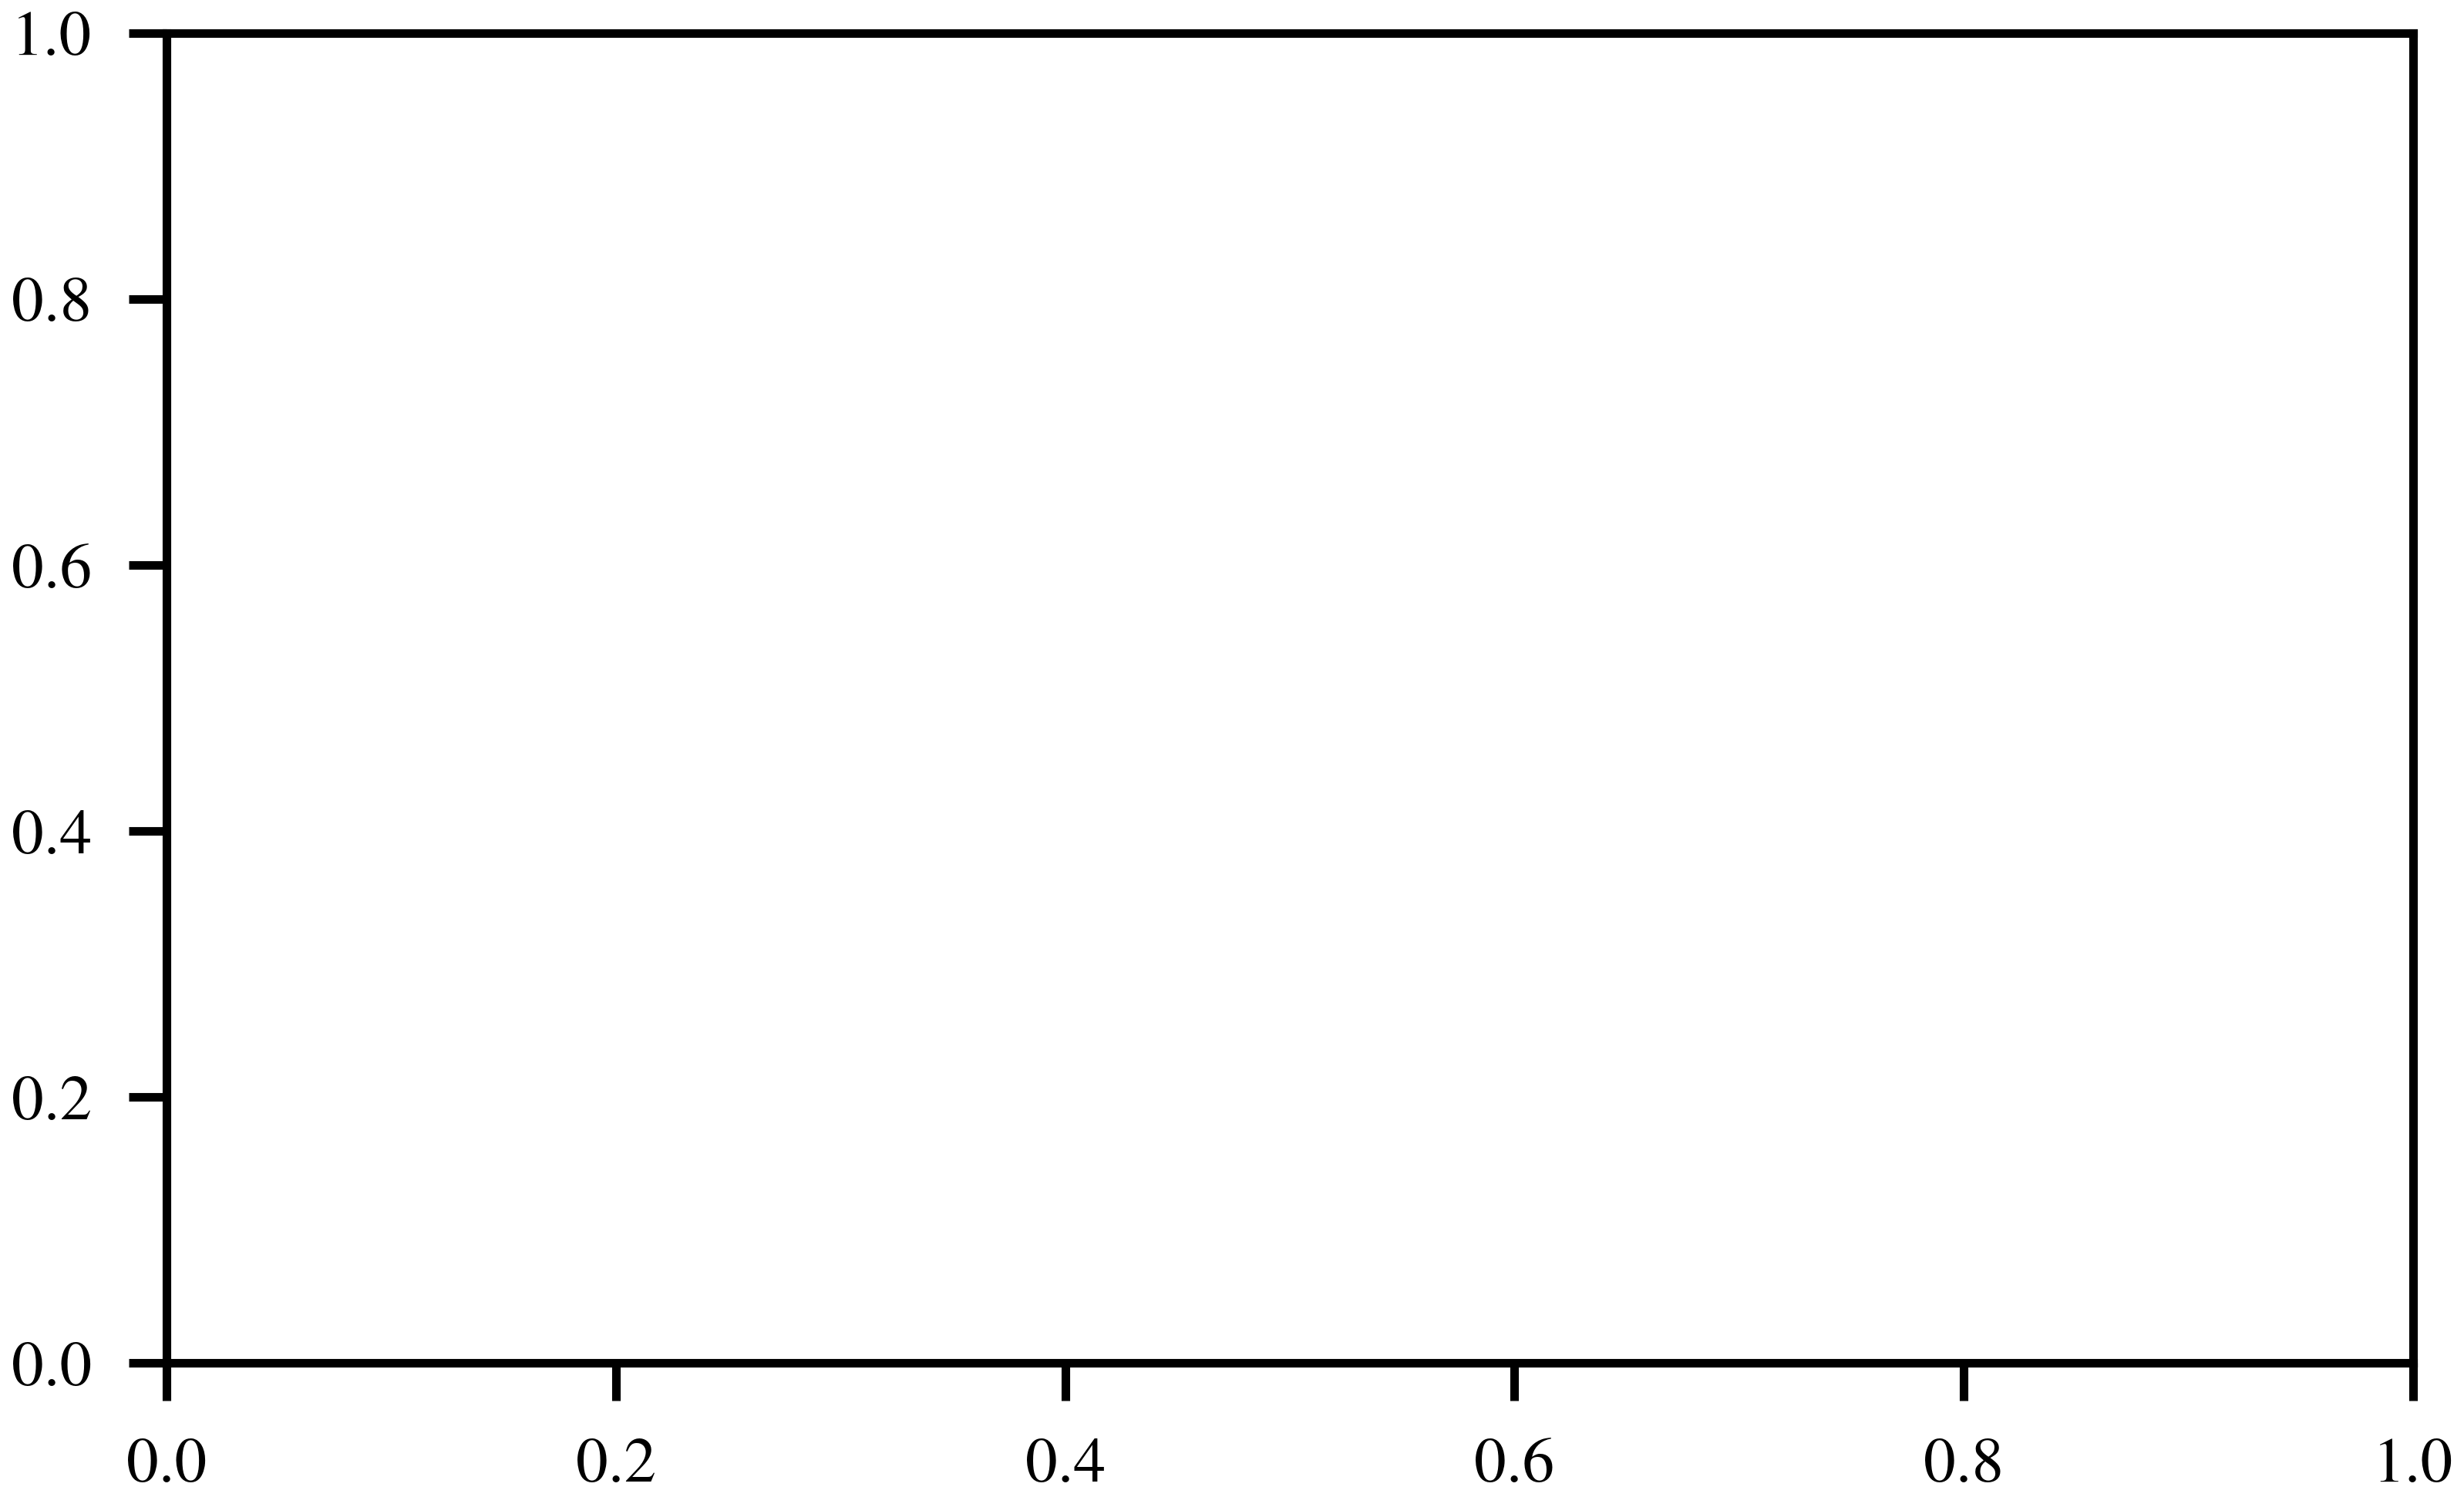

In [2]:
"""
config state:

alpha: 0.0003
beta: 0.0003
gamma: 0.99
n_actions: 4
max_size: 1000000
tau: 0.005
layer1_size: 256
layer2_size: 256
batch_size: 256
reward_scale: 2
checkpoint_dir: "SAC/SelfMade/tmp/checkpoints"
log_dir: "runs/hockey_sac_training"
n_games: 5000
resume_training: False
opponent_update_interval: 20
win_rate_threshold: 0.6

"""

paths = [
    'csv_data/training_log_basic_weak_bot1.csv',
    'csv_data/training_log_basic_weak_bot2.csv',
    'csv_data/training_log_basic_strong_bot1.csv',
    'csv_data/training_log_basic_strong_bot2.csv',
    'csv_data/training_log_basic_strong_bot3.csv',
    'csv_data/training_log_basic_weak_bot3.csv'
]


smoothing_window = 100
fig, ax = plt.subplots()


for path in paths:
    df = pd.read_csv(path)
    color = rgb.tue_darkblue if 'strong' in path else rgb.tue_darkgreen


    episodes = df['epsiode'][0:5000]
    rewards = df['reward'][0:5000]

    smoothed_rewards = rewards.rolling(window=smoothing_window, min_periods=1).mean()

    ax.plot(episodes[20:], smoothed_rewards[20:], ms=0.1, lw=0.5, color=color, zorder=3,
            label='Strong Opponent' if 'strong' in path else 'Weak Opponent')



#ax.set_ylim([0, 400])
ax.yaxis.set_major_locator(plt.MultipleLocator(10))
ax.grid(axis="y", which="major", color=rgb.tue_gray, alpha=0.3, linewidth=0.3, zorder=1)

#ax.set_xlim([years[0] - 0.5, years[-1] + 1])
#ax.set_xticks(episodes[1::2])
#ax.tick_params(axis='x', rotation=90)
#ax.tick_params(axis='both', labelsize=8, width=0.3, length=2)

ax.set_xlabel('episodes', fontsize=9.5)
ax.set_ylabel('average reward', fontsize=9.5)
ax.set_title('Training vs Basic Opponent', fontsize=9.5)

# Add legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), fontsize=8, loc='best')

plt.show()
fig.savefig('fig_SAC_TrainingVsOpponent.pdf')

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

path = 'csv_data/league/training_log_league_4.csv'
smoothing_window = 100

# Load the data
df = pd.read_csv(path)

# Group by opponent (fix typo)
grouped = df.groupby("opponent")

# Count and sort the number of games per opponent
game_counts = grouped.size().sort_values(ascending=False)

# Print number of games per opponent sorted descending
print("Number of games played against each opponent (descending):")
print(game_counts)

# Plotting setup
plt.figure(figsize=(12, 6))

# Plot reward per opponent with smoothing
for opponent in game_counts.index:
    group = grouped.get_group(opponent)
    smoothed_rewards = group["reward"].rolling(window=smoothing_window, min_periods=1).mean()
    plt.plot(group["episode"], smoothed_rewards, label=f"{opponent} ({len(group)} games)", lw=1)

# Plot labels and formatting
plt.xlabel("Episode")
plt.ylabel("Smoothed Reward")
plt.title("Reward over Episodes per Opponent (Smoothed)")
plt.legend(title="Opponent (games played)", fontsize='small')
plt.grid(True)

plt.tight_layout()
plt.show()


Number of games played against each opponent (descending):
opponent
agent3                          968
agent2                          898
atk_bot                         893
agent4                          855
agent_trained_vs_league2        772
weak_bot                        697
strong_bot                      685
def_bot                         656
agent_trained_vs_league1        610
prev_self                       607
agent_trained_vs_defense_bot    503
agent_trained_vs_strong_bot     336
agent_trained_vs_attack_bot     332
agent5_shit_agent               312
dtype: int64


/tmp/ipykernel_1235782/3826163702.py:36: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
